In [1]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

616

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retreival     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retreival     
-----------------------------
Processing Record 1 of Set 1 | bireun
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | port keats
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | zabid
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | vallenar
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | gambela
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 22 of Se

Processing Record 38 of Set 4 | dujuma
City not found. Skipping...
Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | inuvik
Processing Record 41 of Set 4 | yabrud
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | tlahualilo
City not found. Skipping...
Processing Record 48 of Set 4 | rome
Processing Record 49 of Set 4 | avarua
Processing Record 50 of Set 4 | tulum
Processing Record 1 of Set 5 | colina
Processing Record 2 of Set 5 | baiao
Processing Record 3 of Set 5 | fukue
Processing Record 4 of Set 5 | banda aceh
Processing Record 5 of Set 5 | uruzgan
Processing Record 6 of Set 5 | novoagansk
Processing Record 7 of Set 5 | taganak
Processing Record 8 of Set 5 | ariquemes
Processing Record 9 of Set 5 | saint-philippe
Processing Record 10 of Set 5 | beroroha
Processing Record 11

Processing Record 31 of Set 8 | seabra
Processing Record 32 of Set 8 | mazatlan
Processing Record 33 of Set 8 | malangwa
Processing Record 34 of Set 8 | chingirlau
Processing Record 35 of Set 8 | solnechnyy
Processing Record 36 of Set 8 | madimba
Processing Record 37 of Set 8 | kiama
Processing Record 38 of Set 8 | jambi
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | buriti bravo
Processing Record 41 of Set 8 | vestmanna
Processing Record 42 of Set 8 | ahja
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | kedrovyy
Processing Record 45 of Set 8 | maumere
Processing Record 46 of Set 8 | yerbogachen
Processing Record 47 of Set 8 | eldama ravine
Processing Record 48 of Set 8 | arua
Processing Record 49 of Set 8 | broome
Processing Record 50 of Set 8 | obo
Processing Record 1 of Set 9 | stornoway
Processing Record 2 of Set 9 | adrar
Processing Record 3 of Set 9 | asosa
Processing Record 4 of Set 9 | griffith
Processing Record 5 of Set 9 | tazmal

City not found. Skipping...
Processing Record 20 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 21 of Set 12 | goderich
Processing Record 22 of Set 12 | cunha
Processing Record 23 of Set 12 | suntar
Processing Record 24 of Set 12 | atambua
Processing Record 25 of Set 12 | gushikawa
Processing Record 26 of Set 12 | basco
Processing Record 27 of Set 12 | caborca
Processing Record 28 of Set 12 | wuhu
Processing Record 29 of Set 12 | taksimo
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | kihei
Processing Record 32 of Set 12 | trinidad
Processing Record 33 of Set 12 | liuzhou
Processing Record 34 of Set 12 | khanu woralaksaburi
Processing Record 35 of Set 12 | bodden town
Processing Record 36 of Set 12 | destin
Processing Record 37 of Set 12 | almaznyy
Processing Record 38 of Set 12 | palmer
Processing Record 39 of Set 12 | warren
Processing Record 40 of Set 12 | roald
Processing Record 41 of Set 12 | bathsheba
Processing Record 42 of Set 12 | 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

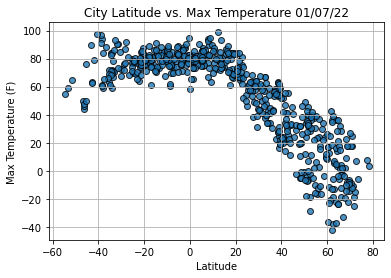

In [12]:
# Impor time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

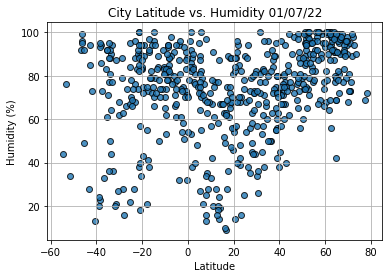

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

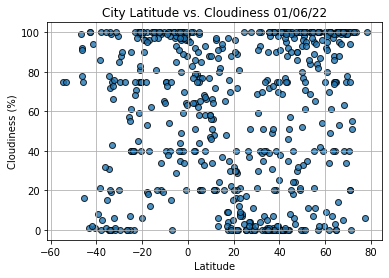

In [22]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

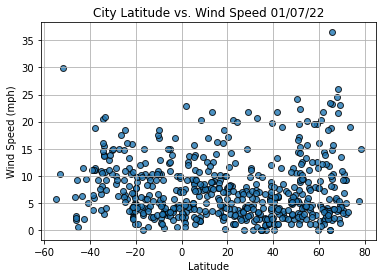

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black',
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [15]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [16]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Find the Correlation between Latitude & Max Temp

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

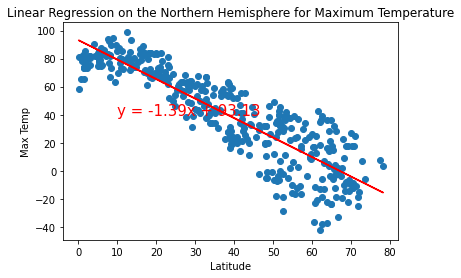

In [19]:
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

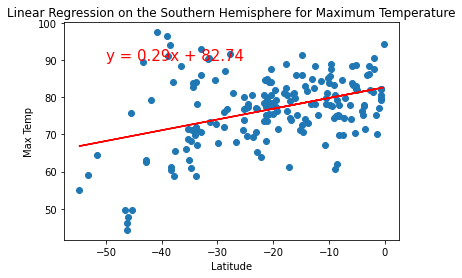

In [21]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50, 90))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

## Finding the Correlation between Latitude & Humidity

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

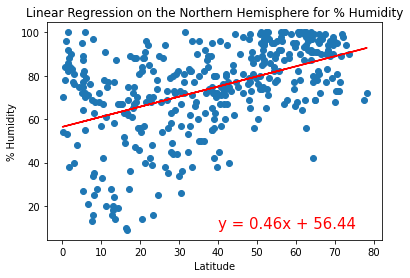

In [23]:
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40, 10))

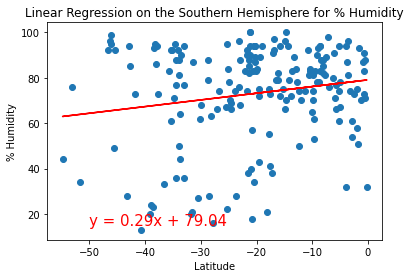

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50, 15))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

## Find the Correlation between Latitude and Cloudiness

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

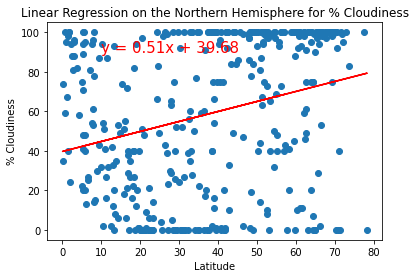

In [27]:
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10, 90))

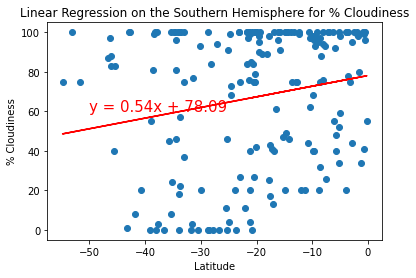

In [30]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50, 60))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

## Find the Correlation between Latitude and Wind Speed

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

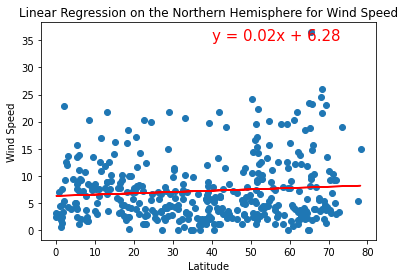

In [32]:
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40, 35))

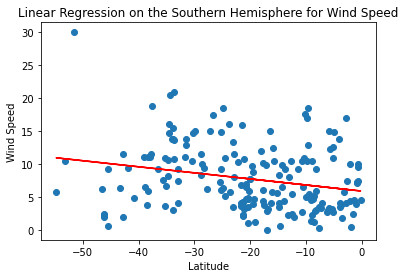

In [35]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50, 45))

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 